# Decision Tree Breast Cancer Dataset

In [40]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [41]:
RANDOM_SEED = 9
DATASPLIT = 0.3

In [42]:
dataset = load_breast_cancer(as_frame=True)

data = dataset.data
labels = dataset.target

data_train, data_test, label_train, label_test = train_test_split(data, labels, test_size=DATASPLIT, random_state=RANDOM_SEED)

data_train, data_val, label_train, label_val = train_test_split(data_train, label_train, test_size=DATASPLIT, random_state=RANDOM_SEED)

data_train.describe()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,278.000000,278.000000,278.000000,278.00000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,...,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000
mean,14.137953,19.234281,92.054712,651.43777,0.095927,0.103535,0.089565,0.048899,0.179933,0.062464,...,16.253504,25.779892,107.240540,870.464388,0.132086,0.255099,0.276383,0.114630,0.290586,0.083449
std,3.343528,4.058044,23.306598,323.06594,0.013799,0.054745,0.084108,0.038914,0.025714,0.006997,...,4.537265,5.766625,32.129437,509.805127,0.022521,0.162864,0.217103,0.063553,0.058807,0.017951
min,7.760000,10.380000,47.920000,181.00000,0.052630,0.026500,0.000000,0.000000,0.106000,0.049960,...,8.952000,14.820000,56.650000,240.100000,0.087740,0.043270,0.000000,0.000000,0.156600,0.055210
25%,11.802500,16.545000,75.330000,429.45000,0.085910,0.062385,0.028535,0.020280,0.161425,0.057638,...,13.107500,21.612500,84.610000,527.250000,0.115925,0.138275,0.117125,0.065280,0.250525,0.071010
50%,13.525000,18.760000,87.410000,566.25000,0.095830,0.086195,0.059345,0.033860,0.177750,0.061075,...,15.125000,25.445000,99.260000,707.750000,0.130350,0.211450,0.228250,0.100900,0.282650,0.079985
75%,15.780000,21.675000,103.775000,782.67500,0.105375,0.128975,0.119175,0.067382,0.194575,0.065735,...,19.047500,29.452500,125.650000,1114.500000,0.146000,0.337950,0.378925,0.156950,0.318500,0.092105
max,25.730000,39.280000,174.200000,2010.00000,0.137100,0.345400,0.426400,0.191300,0.290600,0.095750,...,33.130000,45.410000,229.300000,3234.000000,0.222600,1.058000,1.252000,0.291000,0.544000,0.207500


In [ ]:
parameters = {
    'max_depth': range(3,20)
}

clf = GridSearchCV(DecisionTreeClassifier(random_state=RANDOM_SEED), parameters, n_jobs=4)

clf.fit(data_val, label_val)

model = clf.best_estimator_
print("Best corssvalidation score: ", clf.best_score_)
print("With parameters: ", clf.best_params_)

print("Training model with best parameters")
model.fit(data_train, label_train)

accuracy = model.score(data_test, label_test)
print("Accuracy: ", accuracy)

predictions = model.predict(data_test)
f1 = f1_score(label_test, predictions, average='weighted')

print("F1 score: ", f1)



Best corssvalidation score:  0.9416666666666667
With parameters:  {'max_depth': 3}
Training model with best parameters
Accuracy:  0.9473684210526315
F1 score:  0.9596412556053812


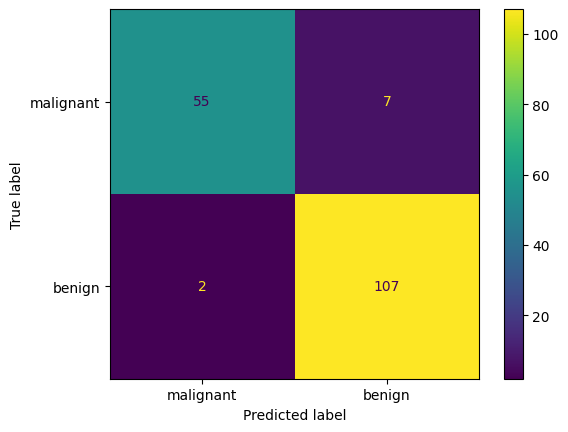

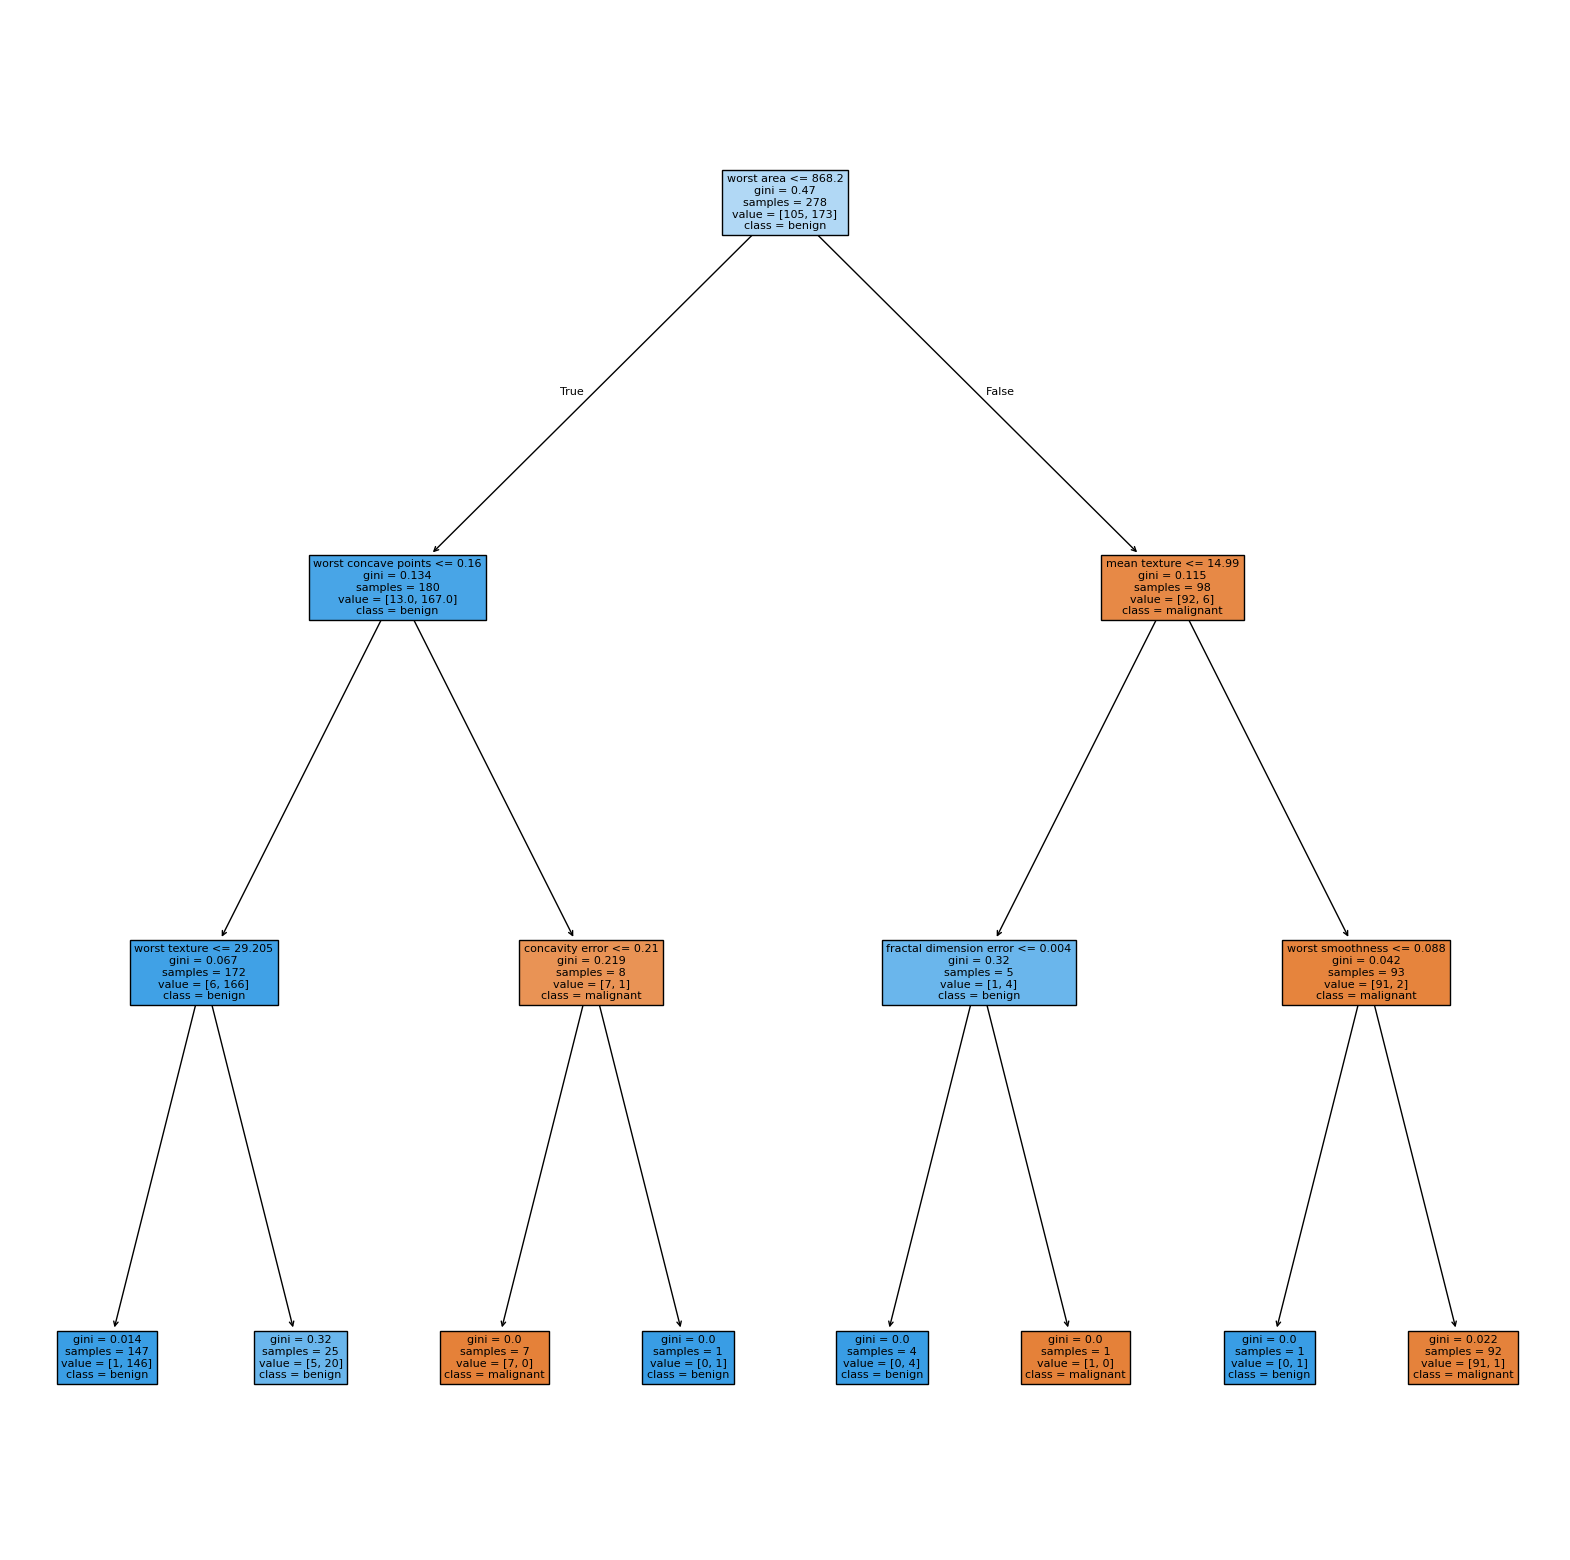

In [44]:
cm = confusion_matrix(label_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dataset.target_names)
disp.plot()
plt.show()

plt.figure(figsize=(20,20))
plot_tree(model, filled=True, feature_names=dataset.feature_names, class_names=dataset.target_names)
plt.show()